# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

This notebook includes:
- approximate entropy
- sample entropy
- permutation entropy
- weighted permutation entropy

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_knee, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import app_entropy, sample_entropy, perm_entropy, wperm_entropy
from apm.methods.settings import (AP_ENT_PARAMS, SA_ENT_PARAMS,
                                  PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import N_SIMS
from apm.sim.examples import get_examples, check_examples
from apm.sim.defs import SIM_ITERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Check settings for entropy measures
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('WPermutation Entropy:\t', WPE_ENT_PARAMS)

Approximate Entropy:	 {'order': 2}
Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
WPermutation Entropy:	 {'order': 3, 'delay': 1}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '25_entropy'

In [7]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [8]:
# Define collection of example signals
examples = get_examples()

## Calculating Entropy Measures on Example Signals

Entropy measures generally measure the level of 'randomness' or complexity in a signal. 

In all cases, smaller values of measured entropy indicate more regular time series. 

In [9]:
# Check the calculated approximate entropy across some example signals
check_examples(examples, app_entropy, AP_ENT_PARAMS, 'approximate entropy')

Computed approximate entropy:
  powerlaw       : 	 1.4065
  synaptic       : 	 1.9387
  knee           : 	 1.6985
  oscillation    : 	 0.1842
  burst          : 	 0.1081
  combined       : 	 1.3531
  comb-burst     : 	 1.3502
  comb-peak      : 	 1.3613


In [10]:
# Check the calculated sample entropy across some example signals
check_examples(examples, sample_entropy, SA_ENT_PARAMS, 'sample entropy')

Computed sample entropy:
  powerlaw       : 	 1.3158
  synaptic       : 	 1.9033
  knee           : 	 1.6268
  oscillation    : 	 0.2815
  burst          : 	 0.0267
  combined       : 	 1.2610
  comb-burst     : 	 1.2496
  comb-peak      : 	 1.2566


In [11]:
# Check the calculated permutation entropy across some example signals
check_examples(examples, perm_entropy, PE_ENT_PARAMS, 'permutation entropy')

Computed permutation entropy:
  powerlaw       : 	 2.5270
  synaptic       : 	 2.5496
  knee           : 	 2.4861
  oscillation    : 	 1.4010
  burst          : 	 1.1077
  combined       : 	 2.4948
  comb-burst     : 	 2.5041
  comb-peak      : 	 2.4819


In [12]:
# Check the calculated weighted permutation entropy across some example signals
check_examples(examples, wperm_entropy, WPE_ENT_PARAMS, 'weighted permutation entropy')

Computed weighted permutation entropy:
  powerlaw       : 	 0.9043
  synaptic       : 	 0.9404
  knee           : 	 0.8551
  oscillation    : 	 0.3930
  burst          : 	 0.4080
  combined       : 	 0.8789
  comb-burst     : 	 0.8898
  comb-peak      : 	 0.8582


## Approximate Entropy

Approximate entropy quantifies the unpredictability of a time series.

#### Aperiodic Variations

In [13]:
# Run simulations calculating approximate entropy across exponents
ap_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], app_entropy, AP_ENT_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], app_entropy, AP_ENT_PARAMS, N_SIMS)

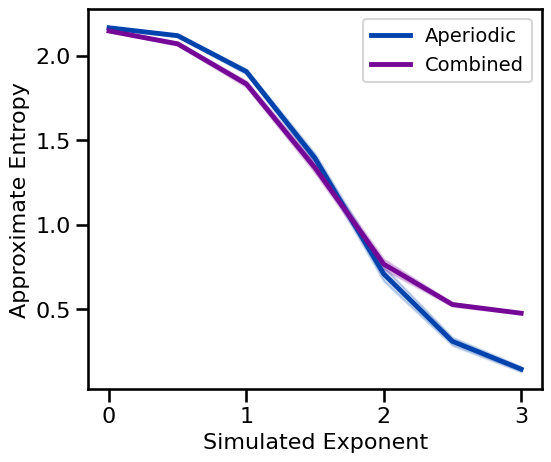

In [15]:
# Plot approximate entropy measures across aperiodic variations
plot_ap_sims(ap_sims_exp, ap_sims_comb, 'Approximate Entropy', 
             save_fig=SAVE_FIG, file_name='ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [16]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], app_entropy, AP_ENT_PARAMS, N_SIMS)

In [17]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], app_entropy, AP_ENT_PARAMS, N_SIMS)

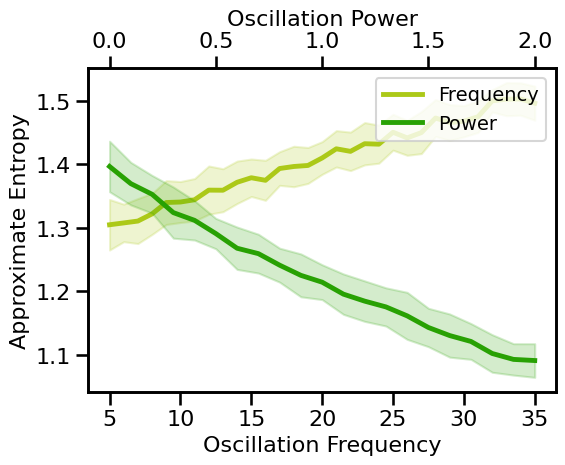

In [18]:
# Plot approximate entropy measures across aperiodic variations
plot_pe_sims(ap_sims_freq, ap_sims_pow, 'Approximate Entropy', 
             save_fig=SAVE_FIG, file_name='ap_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [19]:
# Run simulations calculating approximate entropy across timescales
ap_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], app_entropy, AP_ENT_PARAMS, N_SIMS)

In [20]:
# Run simulations calculating approximate exntropy across different knee parameters (sims from file)
ap_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', app_entropy, AP_ENT_PARAMS)

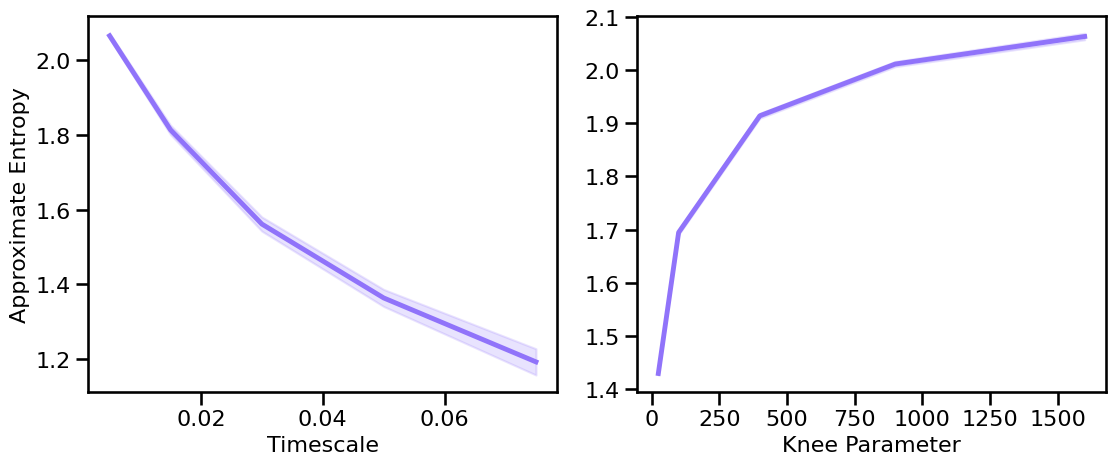

In [21]:
# Plot the estimated approximate entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, ap_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, ap_sims_knee, 'Knee Parameter',
              ylabel='Approximate Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='ap_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [22]:
# Run simulations calculating approximate entropy across peak bandwidths (sims from file)
ap_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', app_entropy, AP_ENT_PARAMS)

In [23]:
# Run simulations calculating approximate entropy across burst probabilities
ap_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], app_entropy, AP_ENT_PARAMS, N_SIMS)

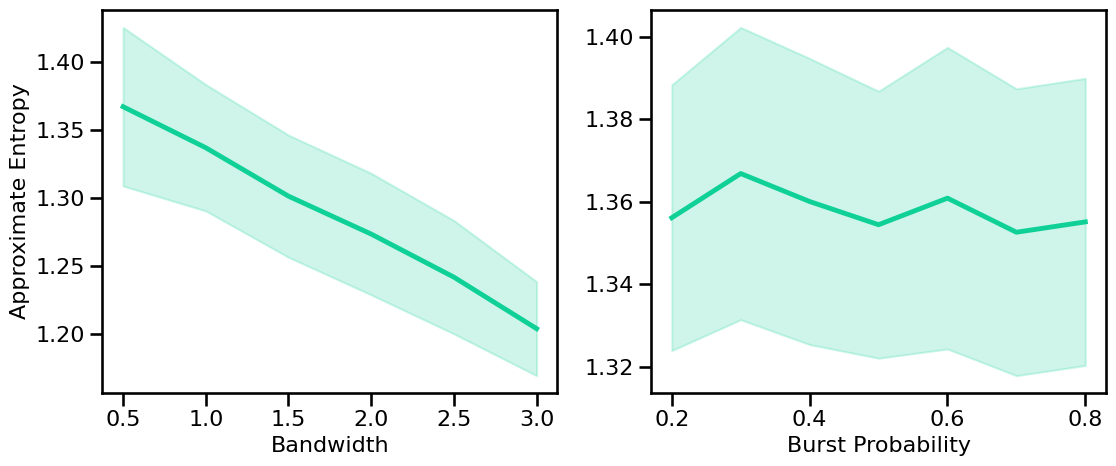

In [24]:
# Plot the estimated approximate entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, ap_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, ap_sims_burst, 'Burst Probability',
              ylabel='Approximate Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='ap_pe_vars' + EXT, file_path=FIGPATH)

## Sample Entropy

Sample entropy is a modification of approxmiate entropy for physiological time series.

The modifications of sample entropy make it data length independent.

#### Aperiodic Variations

In [25]:
# Run simulations calculating sample entropy across exponents
sa_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [26]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

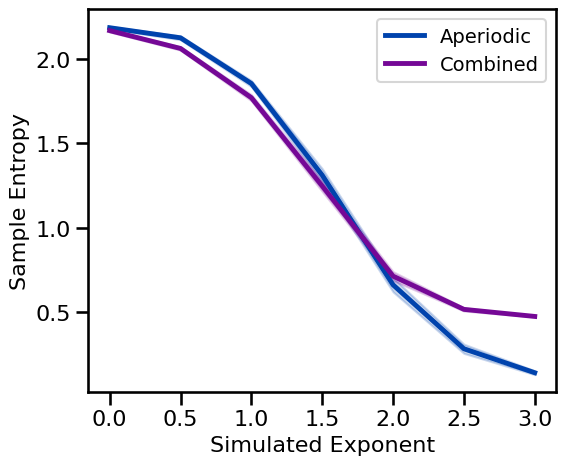

In [27]:
# Plot sample entropy measures across aperiodic variations
plot_ap_sims(sa_sims_exp, sa_sims_comb, 'Sample Entropy', 
             save_fig=SAVE_FIG, file_name='sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [28]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(\
    sim_combined, SIM_ITERS['osc_freq'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [29]:
# Run simulations calculating sample entropy across oscillation power
sa_sims_pow = run_sims(\
    sim_combined, SIM_ITERS['osc_pow'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

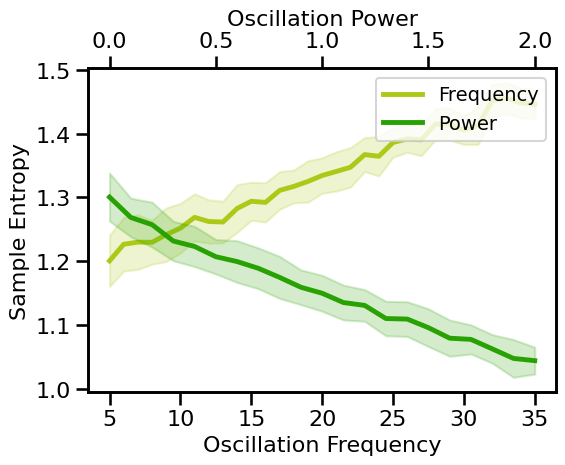

In [30]:
# Plot sample entropy measures across periodic variations
plot_pe_sims(sa_sims_freq, sa_sims_pow, 'Sample Entropy', 
             save_fig=SAVE_FIG, file_name='sa_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [31]:
# Run simulations calculating sample entropy across timescales
sa_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

In [32]:
# Run simulations calculating sample exntropy across different knee parameters (sims from file)
sa_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', sample_entropy, SA_ENT_PARAMS)

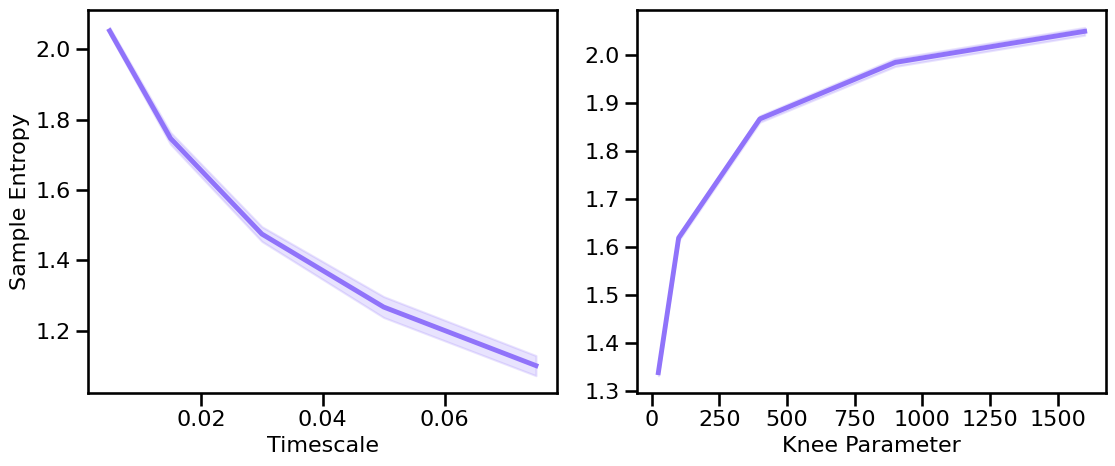

In [33]:
# Plot the estimated sample entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, sa_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, sa_sims_knee, 'Knee Parameter',
              ylabel='Sample Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='sa_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [34]:
# Run simulations calculating sample entropy across peak bandwidths (sims from file)
sa_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', sample_entropy, SA_ENT_PARAMS)

In [35]:
# Run simulations calculating sample entropy across burst probabilities
sa_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], sample_entropy, SA_ENT_PARAMS, N_SIMS)

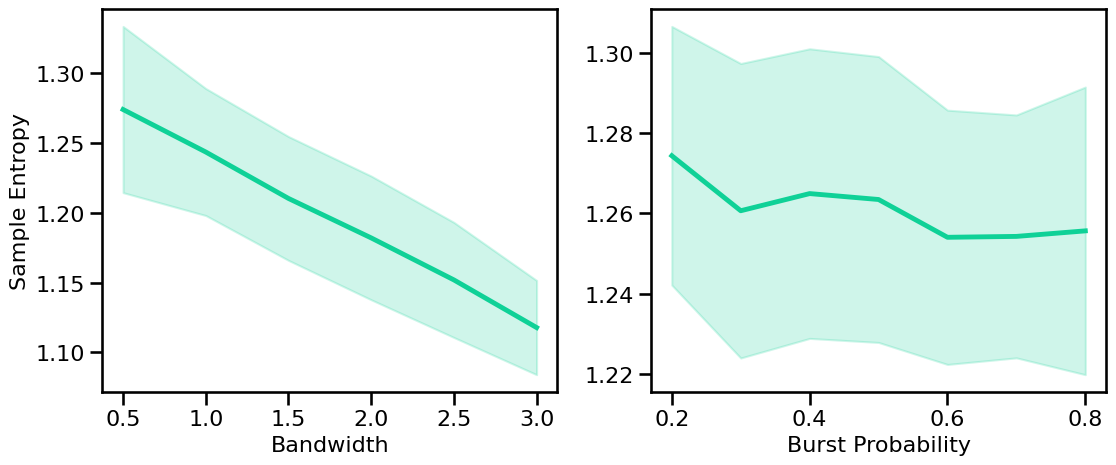

In [36]:
# Plot the estimated sample entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, sa_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, sa_sims_burst, 'Burst Probability',
              ylabel='Sample Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='sa_pe_vars' + EXT, file_path=FIGPATH)

## Permutation Entropy

Permutation entropy is a measure of entropy based on the probabilities of sequences within the time series.

Permutation entropy was introduced in 2002 by Bandt & Pompe.

#### Aperiodic Variations

In [37]:
# Run simulations calculating permutation entropy across exponents
pe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [38]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

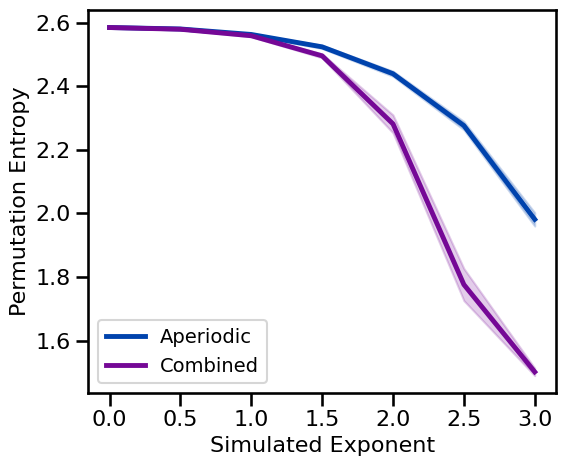

In [39]:
# Plot permutation entropy measures across periodic variations
plot_ap_sims(pe_sims_exp, pe_sims_comb, 'Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [40]:
# Run simulations calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [43]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

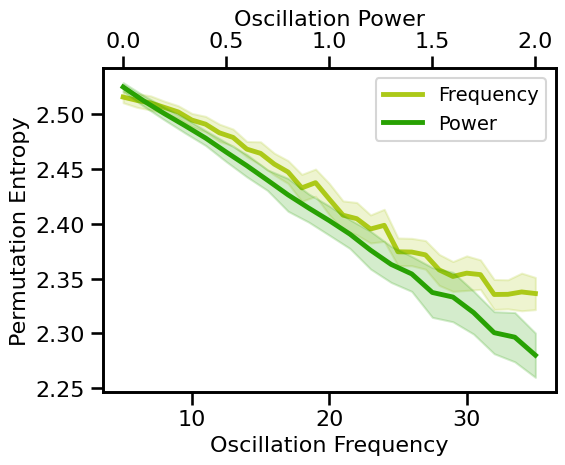

In [44]:
# Plot permutation entropy measures across periodic variations
plot_pe_sims(pe_sims_freq, pe_sims_pow, 'Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='pe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [45]:
# Run simulations calculating permutation entropy across timescales
pe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

In [46]:
# Run simulations calculating permutation entropy across different knee parameters (sims from file)
pe_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', perm_entropy, PE_ENT_PARAMS)

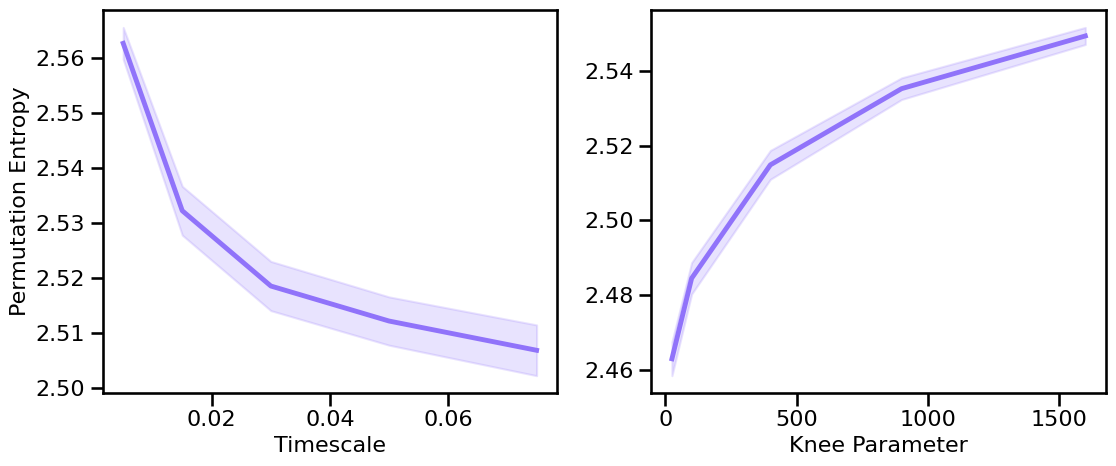

In [47]:
# Plot the estimated permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, pe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, pe_sims_knee, 'Knee Parameter',
              ylabel='Permutation Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='pe_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [48]:
# Run simulations calculating permutation entropy across peak bandwidths (sims from file)
pe_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', perm_entropy, PE_ENT_PARAMS)

In [49]:
# Run simulations calculating permutation entropy across burst probabilities
pe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], perm_entropy, PE_ENT_PARAMS, N_SIMS)

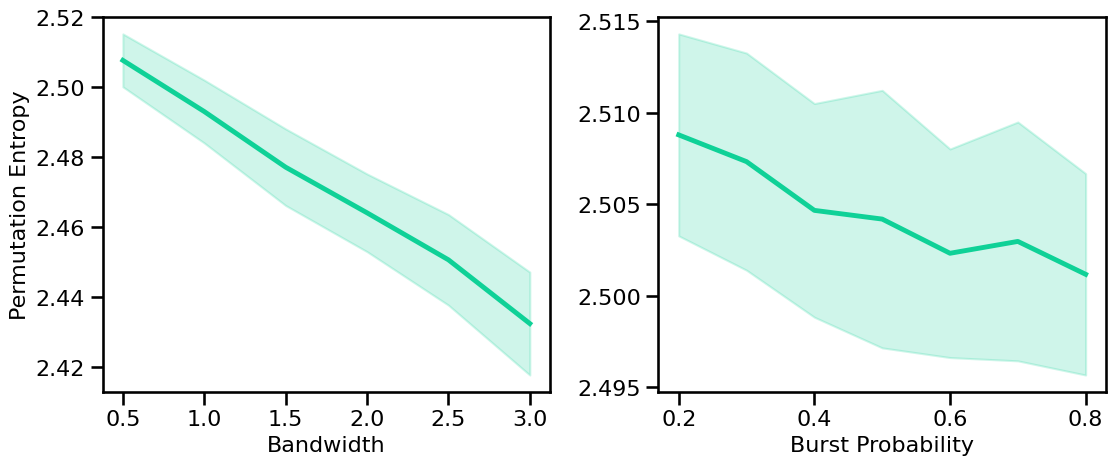

In [50]:
# Plot the estimated permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, pe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, pe_sims_burst, 'Burst Probability',
              ylabel='Permutation Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='pe_pe_vars' + EXT, file_path=FIGPATH)

## Weighted Permutation Entropy

#### Aperiodic Variations

In [51]:
# Run simulations calculating weighted permutation entropy across exponents
wpe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [52]:
# Run simulations calculating weighted permutation entropy across exponents, with an oscillation
wpe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

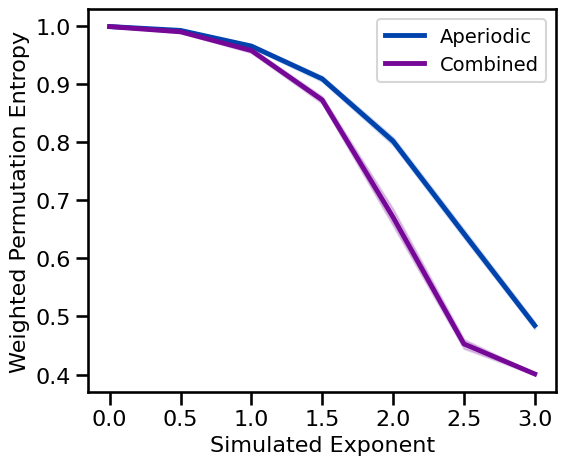

In [53]:
# Plot weighted permutation entropy measures across periodic variations
plot_ap_sims(wpe_sims_exp, wpe_sims_comb, 'Weighted Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='wpe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [54]:
# Run simulations calculating weighted permutation entropy across oscillation frequency
wpe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [55]:
# Run simulations calculating weighted permutation entropy across oscillation power
wpe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

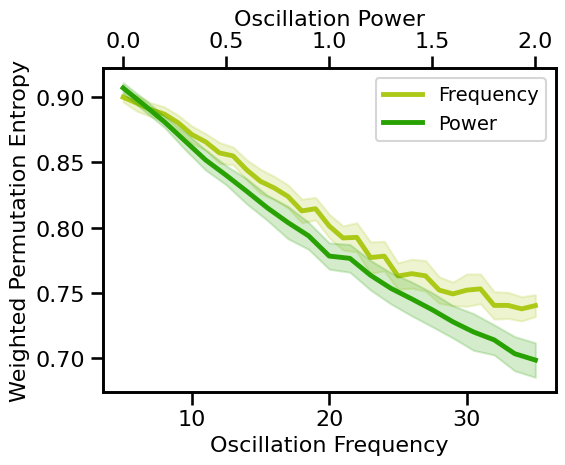

In [56]:
# Plot weighted permutation entropy measures across periodic variations
plot_pe_sims(wpe_sims_freq, wpe_sims_pow, 'Weighted Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='wpe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [57]:
# Run simulations calculating weighted permutation entropy across timescales
wpe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

In [58]:
# Run simulations calculating weighted permutation exntropy across different knee parameters (sims from file)
wpe_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', wperm_entropy, WPE_ENT_PARAMS)

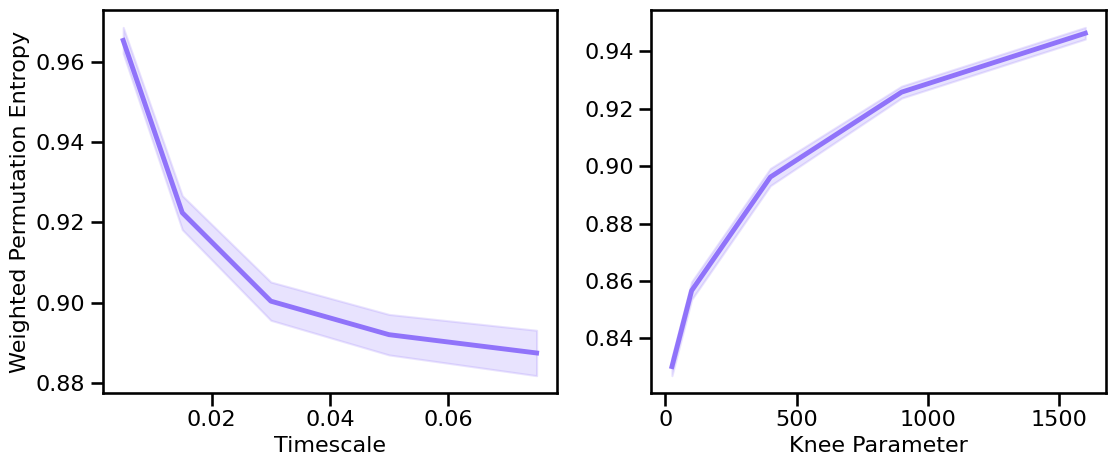

In [59]:
# Plot the estimated weighted permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, wpe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, wpe_sims_knee, 'Knee Parameter',
              ylabel='Weighted Permutation Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='wpe_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [60]:
# Run simulations calculating weighted permutation entropy across peak bandwidths (sims from file)
wpe_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', wperm_entropy, WPE_ENT_PARAMS)

In [61]:
# Run simulations calculating weighted permutation entropy across burst probabilities
wpe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], wperm_entropy, WPE_ENT_PARAMS, N_SIMS)

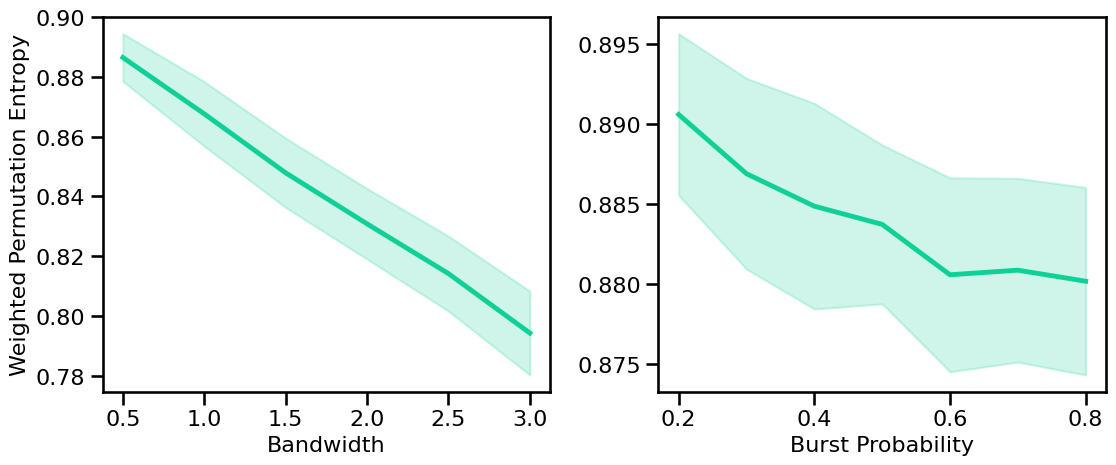

In [62]:
# Plot the estimated weighted permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, wpe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, wpe_sims_burst, 'Burst Probability',
              ylabel='Weighted Permutation Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='wpe_pe_vars' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Entropy (general patterns across all):
- Entropy increases for decreasing aperiodic exponents, non-linearly
- Entropy decreases for increasing oscillatory power, approximately linearly